<a href="https://colab.research.google.com/github/Samrudh29/commentbox/blob/master/Copy_of_term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [ ]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-02-16 04:46:06--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-02-16 04:46:07--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-02-16 04:46:07--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [ ]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [ ]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [ ]:
# Create dataframe with given dict "terms"
import pandas as pd
import numpy as np
df = pd.DataFrame.from_dict(terms)


In [ ]:

# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

## create dataframe with document APW_ENG_20100101.0001
df_6 = df[df["id"] == "APW_ENG_20100101.0001"]

## sort dataframe with count column name
df_count_6= df_6.sort_values(by=['count'], ascending=False).reset_index(drop=True)

## list out all the terms
list_6 = df_count_6["term"].tolist()
## print top 6 terms
print(list_6[0:6])

['a', 'the', 'of', 'to', 'brooks', 'and']


In [ ]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.
## create dataframe with document APW_ENG_20100102.0077
df_10 = df[df["id"] == "APW_ENG_20100102.0077"]

df_group = df_10.groupby('field')

bodyTerm = df_group.get_group('body').sort_values(by=['count'], ascending=False).reset_index(drop=True)

titleTerm = df_group.get_group('title').sort_values(by=['count'], ascending=False).reset_index(drop=True)

combined = pd.concat([bodyTerm, titleTerm ], sort=False)
result = combined.groupby(by='term').sum().sort_values(by='count', ascending=False).head(10)
print(result)




           count
term            
the           50
to            22
in            21
and           19
a             14
of            14
said           8
was            8
militants      8
on             8


In [ ]:
# TODO: Print the 10 terms with the highest total count in the corpus.
## sort dataframe with count column name
df_total_10= df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
# ## list out all the terms
total_10 = df_total_10["term"].tolist()

# ## print top 10 terms
print(total_10[0:10])

['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the']


In [ ]:
df_group = df.groupby('field')

bodyTerm = df_group.get_group('body').sort_values(by=['count'], ascending=False).reset_index(drop=True)

titleTerm = df_group.get_group('title').sort_values(by=['count'], ascending=False).reset_index(drop=True)

combined = pd.concat([bodyTerm, titleTerm ], sort=False)
result = combined.groupby(by='term').sum().sort_values(by='count', ascending=False).head(10)
print(result)

      count
term       
the   62216
to    26931
in    25659
a     23383
of    22326
and   22125
said  10888
for    9716
on     9382
that   8942


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [ ]:
# TODO: Compute the number of distinct documents in the collection.
N = 0
doc_df=df["id"].unique().tolist()
N = len(doc_df)
print("Number of distinct documents: ", N)


Number of distinct documents:  2778


In [ ]:
# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
dict_df = dict()
unique_terms = (df['term'].unique())
# for loop to iterate all distinct documents
for term in unique_terms:
  temp_df = df[df["term"].str.strip()==term]
  dict_df[term] = len(temp_df["id"].unique())
dict_df.items()

In [ ]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.

## create dataframe with term "the"
df_the = df[df["term"] == "the"]
# shape of the dataframe (index 0 is number of documents)
shape = df_the.shape
print("Relative document frequency of 'the':", shape[0]/N)

Relative document frequency of 'the': 0.980561555075594


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [ ]:
 
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]
import math
df_temp = dict()
dff=dict()
for dItem in terms:
  if dItem['term'] in df_temp.keys():
    Temp = set(df_temp[dItem["term"]])
    Temp.add(dItem['id'])
    df_temp[dItem["term"]] = Temp

  else:
    newValue=set()
    newValue.add(dItem['id'])
    df_temp[dItem["term"]]=newValue

for key_value, value_list in df_temp.items():
  dff[key_value]=len(value_list)


tfidf_terms = terms
for idx, dict_ in enumerate(terms):
  tfidf_terms[idx]['tfidf'] = math.log(dict_['count']+1) *math.log(N/dff[dict_['term']])

In [ ]:

import math
tfidf_terms.sort(key= lambda x:x['tfidf'],reverse=True )

In [ ]:
# # TODO: Print the 20 term-document pairs with the highest tf-idf values.
# df_20= final_tfidf_df.sort_values(by=['tf-idf'], ascending=False)
# ## list out all the terms
# term_doc_20 = df_20["id:term"].tolist()

# ## print top 10 terms
# print(term_doc_20[0:20])
d_pairs = tfidf_terms[0:10]
d_pairs



[{'count': 24,
  'field': 'body',
  'id': 'APW_ENG_20100103.0028',
  'term': 'guarani',
  'tfidf': 23.292877770934602},
 {'count': 95,
  'field': 'body',
  'id': 'APW_ENG_20100105.0061',
  'term': 'nomination',
  'tfidf': 22.519372287040166},
 {'count': 15,
  'field': 'body',
  'id': 'APW_ENG_20100105.0446',
  'term': 'methane',
  'tfidf': 21.98520490769353},
 {'count': 14,
  'field': 'body',
  'id': 'APW_ENG_20100103.0015',
  'term': 'kheire',
  'tfidf': 21.473447574098525},
 {'count': 14,
  'field': 'body',
  'id': 'APW_ENG_20100105.0014',
  'term': 'greyhound',
  'tfidf': 21.473447574098525},
 {'count': 18,
  'field': 'body',
  'id': 'APW_ENG_20100107.0036',
  'term': 'shakespeare',
  'tfidf': 21.30695962728155},
 {'count': 28,
  'field': 'body',
  'id': 'APW_ENG_20100105.0061',
  'term': 'guild',
  'tfidf': 20.667542714819742},
 {'count': 16,
  'field': 'body',
  'id': 'APW_ENG_20100106.0428',
  'term': 'shakespeare',
  'tfidf': 20.502093188010598},
 {'count': 12,
  'field': 'body'

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [ ]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = df["term"].unique().tolist()
dict_term = dict()
all_terms=df["term"].unique().tolist()
for term in all_terms:
  dict_term[term] = len(df[df["term"].str.strip()==term])
frequency.sort(key = lambda x:dict_term[x], reverse=True)
print(frequency)

In [ ]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

## To run this you need to run the above section first then the graph will be plotted based on the values.
import matplotlib.pyplot as plt
import numpy
xvalues = numpy.arange(1,len(frequency)+1)
xvalues = numpy.log10(xvalues)
yvalues = list(dict_term.values())
yvalues.sort(reverse=True)
plt.plot(xvalues,yvalues)


In [ ]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = 0
all_terms=df["term"].tolist()
print("Number of tokens in the corpus: ", len(all_terms))

Number of tokens in the corpus:  538301


In [ ]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top_10 = df['term'].value_counts()[0:10]
print(top_10.sum()/len(all_terms))

0.04805489865335565


In [ ]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
temp_once = df['term'].value_counts(ascending=True)
once_list = []
for index in temp_once.index:
  if temp_once[index] == 1:
    once_list.append(index)

print(len(once_list)/len(all_terms))

0.014044187174090332


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [ ]:
# TODO: Data acquisition code here.
# Here I'm using two html files as the data and the choice I'm making is merge them and removing the punctuations and some special characters from the data.
import requests
import string
from bs4 import BeautifulSoup
page = requests.get("https://en.wikipedia.org/wiki/Roger_Federer")
page1 = requests.get("https://en.wikipedia.org/wiki/Michael_Jordan")
page
soup = BeautifulSoup(page.content + page1.content, 'html.parser')
s = soup.prettify()
s = "".join(l for l in s if l not in (string.punctuation,"<",">","\n","/"))
s

'!DOCTYPE htmlhtml class="client-nojs" dir="ltr" lang="en" head  meta charset="utf-8"  title   Roger Federer - Wikipedia  title  script   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fa204b62-ff4d-463d-9f11-55c09e42ef4c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Roger_Federer","wgTitle":"Roger Federer","wgCurRevisionId":1072075579,"wgRevisionId":1072075579,"wgArticleId":262376,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 French-language sources (fr)","All articles with dead external links","Articles with dead external links from November 

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [ ]:
# TODO: Tokenization code here.
#Here I'm counting the resulting terms in each document
from collections import Counter
# c = Counter(s)
# c

word_list = s.split()
c = Counter(word_list)
print(c)


Counter({'a': 24913, 'span': 13091, 'li': 12522, 'td': 3148, 'sup': 2858, 'b': 2603, 'the': 2523, '.': 2329, 'class="nowrap"': 2307, 'i': 1837, 'div': 1804, 'tr': 1390, '–': 1361, 'in': 1253, 'cite': 1248, 'text"': 1184, 'class="external': 1182, 'rel="nofollow"': 1109, 'class="reference"': 1089, 'of': 1056, 'Federer': 1015, 'th': 898, 'class="mw-cite-backlink"': 890, '^': 890, 'class="reference-text"': 890, 'and': 876, 'link': 864, "Men's": 832, 'rel="mw-deduplicated-inline-style"': 830, 'to': 793, 'ul': 791, 'Retrieved': 759, 'Open': 722, ',': 651, 'href="mw-data:TemplateStyles:r1067248974"': 628, 'class="citation': 620, 'class="Z3988"': 620, 'cs1"': 614, 'Jordan': 580, 'p': 538, 'class="reference-accessdate"': 530, 'class="mw-redirect"': 518, ':': 511, 'singles"': 505, 'abbr': 502, 'his': 473, 'at': 470, 'Championships': 449, 'with': 430, 'NBA': 424, 'Wimbledon': 409, 'on': 378, 'web': 376, 'for': 355, 'img': 347, 'decoding="async"': 341, '1.5x,': 341, '2x"': 341, 'from': 327, 'Singl

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

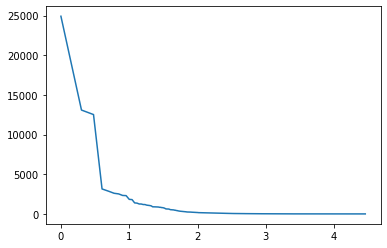

In [ ]:
# As you can see the graph exponentially  decreases.

import numpy
import matplotlib.pyplot as plt
li = list(c.values())
li.sort(reverse=True)
xvalues = numpy.arange(1,len(li)+1)
xvalues = numpy.log10(xvalues)
plt.plot(xvalues,li)